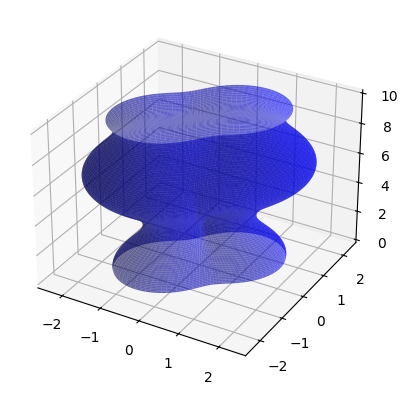

In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from skimage import measure
from stl import mesh
import numpy as np
import time
import datetime

# Parameters
z_min, z_max = 0, 10
A, B = 0.1, 1
wave_amplitude, wave_frequency = 0.5, 2

# Generate the cone with waves
z = np.linspace(z_min, z_max, 500)
theta = np.linspace(0, 2 * np.pi, 500)
z, theta = np.meshgrid(z, theta)
r = A * z + B + wave_amplitude * np.sin(wave_frequency * theta) + wave_amplitude * np.cos(0.5 * wave_frequency * z)

# Convert to Cartesian coordinates
x = r * np.cos(theta)
y = r * np.sin(theta)

# Reshape x, y, and z to create a 3D volume
volume = np.stack((x, y, z), axis=-1)

# Use marching cubes to obtain the surface
vertices, faces, normals, values = measure.marching_cubes(volume, level=0)

# Create the mesh
vase_mesh = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        vase_mesh.vectors[i][j] = vertices[f[j],:]

# Save as STL file
vase_mesh.save('vase.stl')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, rstride=5, cstride=5, color='b', alpha=0.6, linewidth=0)
plt.show()